In [1]:
import torch 
from lightning.pytorch.loggers import WandbLogger
from csp.base import CSPModel
from csp.data import CSPLoader
from csp.models import BluePengiun
from lightning import Trainer
import matplotlib.pylab as plt

In [2]:
opts = {
    'lr': 1e-3,
    'optimizer': 'adam', 
    'num_layers': 2,
    'kernel_size': [128, 64],
    'split': 0.8, 
    'num_workers': 4,
    'batch_size': 256,
    'max_epochs': 25,
    'path_data': [
        '../data/PM_One_Batch_1/', 
        '../data/PM_One_Batch_2/', 
        # 'data/PM_One_Batch_3/',
        # 'data/PM_One_Batch_4/', 
        # 'data/PM_One_Batch_5/', 
        # 'data/PM_One_Batch_6/', 
        # 'data/PM_One_Batch_7/',
        # 'data/PM_One_Batch_8/',  
        # 'data/PM_One_Batch_9/',  
        # 'data/PM_One_Batch_10/',     
    ],
    'path_metadata': '../data/PM_single_truth_10000.csv',
    'num_classes': 9, 
    'seq_len': 2048 
}


In [3]:
loader = CSPLoader(pth_data=opts['path_data'], pth_metadata=opts['path_metadata'], seq_len=opts['seq_len'])
dataloader_train, dataloader_valid = loader.split(
    split_ratio=opts['split'], 
    num_workers=opts['num_workers'], 
    batch_size=opts['batch_size']
)
dset = iter(dataloader_train)
x, y = next(dset)


1600 400


(tensor(-1.),
 tensor(0.8477),
 tensor(8.4013e-05),
 tensor(0.1783),
 torch.Size([256, 2, 2048]),
 torch.Size([256]))

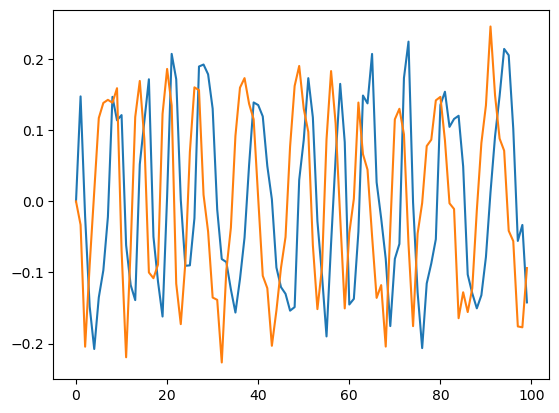

In [4]:
plt.figure()
plt.plot(x[0, 0, :100].numpy())
plt.plot(x[0, 1, :100].numpy())
x.min(), x.max(), x.mean(), x.std(), x.shape, y.shape

In [7]:
for n, (dat, lab) in enumerate(dataloader_train):
    print(dat.shape, lab.shape)
    if n > 100:
        break

torch.Size([256, 2, 2048]) torch.Size([256])
torch.Size([256, 2, 2048]) torch.Size([256])
torch.Size([256, 2, 2048]) torch.Size([256])
torch.Size([256, 2, 2048]) torch.Size([256])
torch.Size([256, 2, 2048]) torch.Size([256])
torch.Size([256, 2, 2048]) torch.Size([256])
torch.Size([64, 2, 2048]) torch.Size([64])


In [8]:
256*3+32

800